# Agregando informações por setor de Macro Área de Reestruturação urbana

In [8]:
# Carrengando um complemento para visualizar quanto tempo demoram as tarefas

%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime


In [35]:
from pathlib import Path
import os
import pandas as pd
import geopandas as gpd
import numpy as np

In [10]:
df_iptu_agg = pd.read_csv(f'resultados/IPTU_1995-agregado-sq-uso.csv.gz',\
              compression='gzip',\
              encoding='utf-8',\
              sep=',',\
              decimal='.',\
              error_bad_lines=False)

In [11]:
df_iptu_agg

,setor,quadra,ANO DO EXERCICIO,TIPO DE USO DO IMOVEL,quantidade_de_contribuintes,area_construida,quantidade_de_lotes,area_terreno,area_ocupada,maximo_de_pavimentos,media_testada
0,1,3,1995,apartamento,41,2575,2.3544,749.6093,515.5445,8.0,16.615854
1,1,3,1995,garagem em edifício de uso exclusivamente resi...,1,220,0.1300,42.9000,29.1200,8.0,12.000000
2,1,3,1995,indústria,1,10109,1.0000,8800.0000,6830.0000,3.0,93.700000
3,1,3,1995,loja,23,7614,23.0000,3966.0000,2241.0000,5.0,7.995652
4,1,3,1995,loja e residência (predominância comercial),15,5164,15.0000,2602.0000,1321.0000,6.0,6.226667
...,...,...,...,...,...,...,...,...,...,...,...
204737,310,117,1995,residência coletiva (mais de uma residência no...,2,375,2.0000,595.0000,249.0000,2.0,17.500000
204738,310,117,1995,terreno,5,0,5.0000,3312.0000,0.0000,0.0,21.800000
204739,310,118,1995,apartamento,240,25215,0.9941,17934.5581,5280.6592,22.0,0.000000
204740,310,119,1995,terreno,1,0,1.0000,18500.0000,0.0000,0.0,0.000000


In [12]:
# Carregando quadras fiscais

gdf_quadras = gpd.GeoDataFrame.from_file(f'zip://GIS/SIRGAS_SHP_quadraMDSF.zip!SIRGAS_SHP_quadraMDSF')

In [13]:
gdf_quadras['sq'] = gdf_quadras.qd_setor + gdf_quadras.qd_fiscal

In [14]:
gdf_quadras = gdf_quadras.loc[gdf_quadras.qd_tipo == 'F'][['sq', 'geometry']].dissolve(by='sq')

In [15]:
gdf_quadras.geometry = gdf_quadras.representative_point()

In [27]:
gdf_quadras

,geometry
sq,
001003,POINT (333387.800 7396468.599)
001004,POINT (333487.097 7396436.735)
001005,POINT (333561.571 7396423.397)
001006,POINT (333606.259 7396412.473)
001007,POINT (333670.058 7396400.965)
...,...
310116,POINT (332733.661 7383530.821)
310117,POINT (333174.165 7383508.667)
310118,POINT (332646.595 7384341.976)


In [30]:
gdf_quadras.to_file('resultados/teste.gpkg', layer='quadras', driver='GPKG')

In [58]:
df_iptu_agg['geometry'] = 'Point(0,0)'

In [17]:
df_iptu_agg['sq'] = (df_iptu_agg.setor * 1000 + df_iptu_agg.quadra).astype(str).str.zfill(6)

In [18]:
gdf_iptu_agg = gdf_quadras.merge(df_iptu_agg, on='sq', how='right')

In [29]:
# gdf_iptu_agg.loc[gdf_iptu_agg.is_valid].to_file('resultados/teste.gpkg', layer='iptu_agregado', driver='GPKG')
gdf_iptu_agg.dtypes

sq                               object
geometry                       geometry
setor                             int64
quadra                            int64
ANO DO EXERCICIO                  int64
TIPO DE USO DO IMOVEL            object
quantidade_de_contribuintes       int64
area_construida                   int64
quantidade_de_lotes             float64
area_terreno                    float64
area_ocupada                    float64
maximo_de_pavimentos            float64
media_testada                   float64
dtype: object

In [36]:
gdf_macroarea = gpd.GeoDataFrame.from_file(f'zip://GIS/PDE_2-Macroarea.zip!sirgas_PDE_2-Macroarea.shp')

<AxesSubplot:>

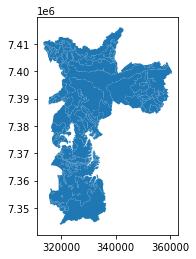

In [37]:
gdf_macroarea.plot()

In [4]:
gdf_setores_estruturacao = gpd.GeoDataFrame.from_file(f'zip://GIS/PDE_2A-Setores-MEM.zip!sirgas_PDE_2A-Setores-MEM.shp')
# gdf_macroarea_estruturacao = gpd.GeoDataFrame.from_file(f'zip://GIS/PDE_2-Macroarea.zip!sirgas_PDE_2-Macroarea.shp')

<AxesSubplot:>

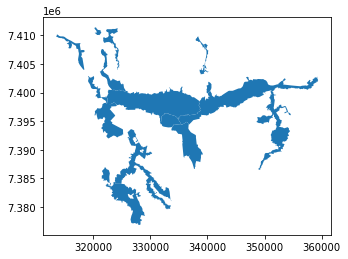

In [6]:
gdf_setores_estruturacao.plot()